## PHYS 105A:  Introduction to Scientific Computing

# Root Finding

Chi-kwan Chan

## Problem Definition

* When we hear about "root finding", one may immediate think about computing the square root of a number, e.g., $\sqrt{2} = 1.414$.

* However, it actually includes a larger group of problems.  For any equation LHS = RHS, we can perform a trivial manipulation and move all terms to one side so that

  $f(x) = 0$
  
* The solutions of the above equation are its roots.  Solving the above equation is called root finding.

* The square root problem above can be casted into the solution of the equaiton $x^2 - 2 = 0$.

## Method 1: Graphical Search for Roots

* It is always a good idea to plot a function.

* We already know how to plot functions in python

* Here, we make things a bit more fun by enabling controls to the plot.

<IPython.core.display.Javascript object>


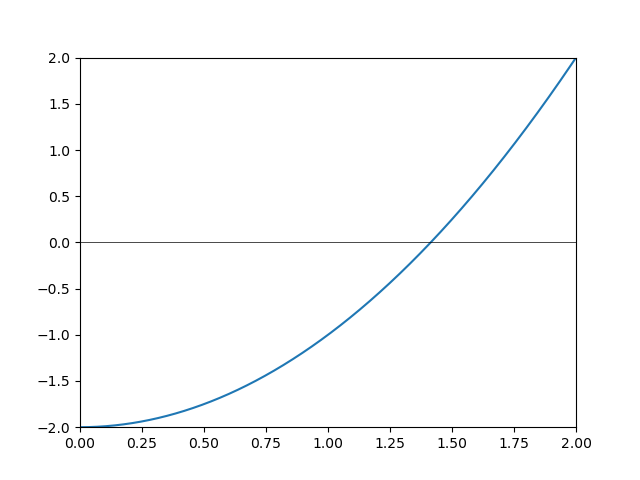

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, step=0.001), FloatSlider(value=2.0, des…

In [42]:
%matplotlib notebook

from ipywidgets import *

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * x - 2

x       = np.linspace(0, 2, 2001)
fig, ax = plt.subplots(1,1)

ax.plot(x, f(x))
ax.axhline(y=0, color='k', lw=0.5)

def update(a=0, b=2, y=2):
    ax.set_xlim( a, b)
    ax.set_ylim(-y, y)
    fig.canvas.draw_idle()

interact(
    update,
    a = (0, 2, 0.001),
    b = (0, 2, 0.001),
    y = (0, 2, 0.001));

* By playing around with the above widgets, we can already find out $1.41 < \sqrt{2} < 1.42$!

* This doesn't require programming a special square root function.  Instead, it simply require evulating the polynomial $x^2 - 2$.

* When we change the domain/x-limit/interval of the plot, we are able to identify the location of the root.

* This is exactly the idea we will use to find roots numerically.

## Bracketing

* A root is called "bracketed in the interval $(a, b)$ if $f(a)$ and $f(b)$ have different signs.

* This is pretty intuitive.  If the function $f$ is continuous, then at least one root must lie in that interval.  This is called the intermediate value theorem.

* Things get tricky if $f$ is discontinuous or unbounded.  But for the lecture let's focus on the simple continuous case only.

* It turns out that there is no good way to guess the bracket.  So let's first implement a program to help us guess the bracket.

In [57]:
def zbrac(f, a, b):
    ntry   = 50
    factor = 1.6
    if a >= b:
        raise ValueError('Bad initial range')
    
    l = f(a)
    r = f(b)
    
    for _ in range(ntry):
        if l * r < 0:
            return a, b
        elif abs(l) < abs(r):
            a += factor * (a - b)
            l  = f(a)
        else:
            b += factor * (b - a)
            r  = f(b)
        print(a, b)
    
    raise Error('Interval not found')

In [61]:
def g(x):
    return x + 1000
    
zbrac(g, -1, 1)

-4.2 1
-12.52 1
-34.152 1
-90.3952 1
-236.62752 1
-616.8315520000001 1
-1605.3620352000003 1


(-1605.3620352000003, 1)